<h1>Mnist 多层感知器版<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#导入工具包" data-toc-modified-id="导入工具包-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>导入工具包</a></span></li><li><span><a href="#导入数据" data-toc-modified-id="导入数据-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>导入数据</a></span></li><li><span><a href="#初始化模型参数" data-toc-modified-id="初始化模型参数-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>初始化模型参数</a></span></li><li><span><a href="#添加隐层" data-toc-modified-id="添加隐层-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>添加隐层</a></span></li><li><span><a href="#定义交叉熵" data-toc-modified-id="定义交叉熵-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>定义交叉熵</a></span></li><li><span><a href="#设置随机梯度下降" data-toc-modified-id="设置随机梯度下降-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>设置随机梯度下降</a></span></li><li><span><a href="#初始化所有参数" data-toc-modified-id="初始化所有参数-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>初始化所有参数</a></span></li><li><span><a href="#进行train" data-toc-modified-id="进行train-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>进行train</a></span></li><li><span><a href="#评价" data-toc-modified-id="评价-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>评价</a></span></li><li><span><a href="#多层隐层" data-toc-modified-id="多层隐层-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>多层隐层</a></span></li><li><span><a href="#结论" data-toc-modified-id="结论-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>结论</a></span></li></ul></div>

## 导入工具包

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners
"""
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function

import argparse
import sys

from tensorflow.examples.tutorials.mnist import input_data

import tensorflow as tf

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

FLAGS = None


## 导入数据

In [2]:
# Import data
data_dir = 'E:/AI/00/data/Mnist/input_data'
mnist = input_data.read_data_sets(data_dir, one_hot=True)

Extracting E:/AI/00/data/Mnist/input_data\train-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\train-labels-idx1-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-images-idx3-ubyte.gz
Extracting E:/AI/00/data/Mnist/input_data\t10k-labels-idx1-ubyte.gz


## 初始化模型参数

In [3]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.random_normal([784,100],stddev=0.1,seed=66))
#用一个较小的正数来初始化偏置项, 
#[784,100]中的100是隐层权重矩阵的列数,大小随意
#[784,100]中的784是为了与x中的[None,784]保持一致
b1 = tf.Variable(tf.zeros([100]))
#[100]同[784,100]中的100保持一致
W2 = tf.Variable(tf.zeros([100, 10]))
#[100,10]中的100同[784,100]中的100保持一致
#[100,10]中的10同最终输出10中的10保持一致
b2 = tf.Variable(tf.zeros([10]))
#[10]同[100,10]中的10保持一致

## 添加隐层

In [4]:
# Define loss and optimizer
hidden1=tf.nn.sigmoid(tf.matmul(x,W1)+b1)  #这里使用传统的Sigmoid非线性激活函数
y = tf.matmul(hidden1, W2) + b2
y_ = tf.placeholder(tf.float32, [None, 10])

## 定义交叉熵

In [5]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

## 设置随机梯度下降

In [6]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

## 初始化所有参数

In [7]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

## 进行train

In [8]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

验证我们模型在测试数据上的准确率

## 评价

In [9]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

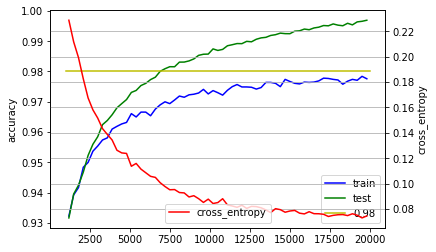

In [10]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [11]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.228677,0.211626,0.199296,0.182547,0.167514,0.158152,0.151683,0.143363,0.138791,0.134402,...,0.075938,0.074209,0.075082,0.075565,0.075699,0.074912,0.076333,0.075197,0.073071,0.074628
test,0.931691,0.939582,0.942473,0.946782,0.952309,0.955982,0.958473,0.962455,0.963836,0.965727,...,0.995164,0.995073,0.995691,0.995291,0.995091,0.995909,0.995382,0.996364,0.996564,0.996909
train,0.932300,0.939300,0.941700,0.948400,0.950000,0.953700,0.955400,0.957400,0.958100,0.961000,...,0.977800,0.977700,0.977400,0.977200,0.975800,0.976800,0.977400,0.977100,0.978400,0.977600


毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层**一层隐层后97.8%**
- 激活函数
- 正则化
- 初始化
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 多层隐层

In [12]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W1 = tf.Variable(tf.truncated_normal([784,100],stddev=0.1))
b1 = tf.Variable(tf.zeros([100]))
W2 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b2 = tf.Variable(tf.zeros([100]))
W3 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b3 = tf.Variable(tf.zeros([100]))
W4 = tf.Variable(tf.truncated_normal([100,100],stddev=0.1))
b4 = tf.Variable(tf.zeros([100]))
W5 = tf.Variable(tf.zeros([100, 10]))
b5 = tf.Variable(tf.zeros([10]))

In [13]:
# 添加隐层
hidden1 = tf.nn.sigmoid(tf.matmul(x,W1)+b1)
hidden2 = tf.nn.relu(tf.matmul(hidden1,W2)+b2)
hidden3 = tf.nn.relu6(tf.matmul(hidden2,W3)+b3)
hidden4 = tf.nn.tanh(tf.matmul(hidden3,W4)+b4)
y = tf.matmul(hidden4, W5) + b5
y_ = tf.placeholder(tf.float32, [None, 10])

In [14]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits_v2(labels=y_, logits=y))

In [15]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [16]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [17]:
# 开始训练,Train

# 设置正确率计算公式
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

a_ce={'train':[],'test':[],'c_e':[]}#用于存放正确率和交叉熵
#{'acc': accuracy, 'c_e': cross_entropy}
for _ in range(20000):
    # 每次获取小批量的数据
    batch_xs, batch_ys = mnist.train.next_batch(100)
    # 执行train_step
    sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
    if _ %300==0:
        #将正确率和交叉熵分别添加进各自的list
        a_ce['train'].append(sess.run(accuracy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['c_e'].append(sess.run(cross_entropy, feed_dict={x: mnist.test.images,y_: mnist.test.labels}))
        a_ce['test'].append(sess.run(accuracy, feed_dict={x: mnist.train.images,y_: mnist.train.labels}))

In [18]:
# 将得到的正确率和交叉熵转换成DataFrame
df=pd.DataFrame(data=a_ce,index=[x for x in range(20000) if x%300==0])
# 删除前几列的异常点
df.drop([0,300,600,900],inplace=True)

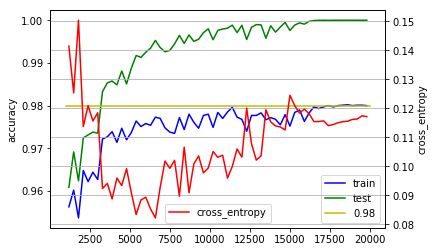

In [19]:
# 绘图

# 子图一: 正确率
ax1 = plt.figure().add_subplot(111)
ax1.plot(df['train'], label='train', color='b')
ax1.plot(df['test'], label='test', color='g')
ax1.plot([1000,20000], [0.98,0.98], label='0.98', color='y')
#ax1.set_ylim([0.970, 0.984])
ax1.set_ylabel('accuracy')
ax1.legend(loc=4)

# 子图一: 交叉熵
ax2 = ax1.twinx()  
ax2.plot(df['c_e'],label='cross_entropy', color='r')
#ax2.set_ylim([0.072, 0.100])
ax2.set_ylabel('cross_entropy')
ax2.legend(loc=8)

plt.grid(True, linestyle = "-")
plt.show()

In [20]:
df.T

,1200,1500,1800,2100,2400,2700,3000,3300,3600,3900,...,17100,17400,17700,18000,18300,18600,18900,19200,19500,19800
c_e,0.141440,0.125305,0.150377,0.113683,0.120942,0.11564,0.118462,0.092325,0.094102,0.088749,...,0.115677,0.114013,0.114407,0.114995,0.115385,0.115547,0.116167,0.116304,0.117423,0.117118
test,0.960855,0.969164,0.962382,0.972436,0.973145,0.97380,0.973545,0.983273,0.985327,0.985764,...,1.000000,0.999982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train,0.956300,0.960200,0.953700,0.964800,0.962200,0.96440,0.962700,0.972200,0.972700,0.973900,...,0.979700,0.980000,0.979700,0.980000,0.980100,0.980200,0.980000,0.980100,0.980100,0.980000


四层隐层之后,正确率达到98%,但是交叉熵并不理想

毫无疑问，这个模型是一个非常简陋，性能也不理想的模型。目前只能达到92%左右的准确率。
接下来，希望大家利用现有的知识，将这个模型优化至98%以上的准确率。
Hint：
- 多隐层**一层隐层后97.8%,四层隐层后到了98.0%**
- 激活函数
- 正则化
- 初始化
- 摸索一下各个超参数
  - 隐层神经元数量
  - 学习率
  - 正则化惩罚因子
  - 最好每隔几个step就对loss、accuracy等等进行一次输出，这样才能有根据地进行调整

## 结论

应当加隐层